In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize']=(10,10)
plt.rcParams['figure.dpi']=500
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df=pd.read_csv('Fraud_check.csv')
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [3]:
#getting information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.3+ KB


In [4]:
df.shape

(600, 6)

In [5]:
df.isnull().any()

Undergrad          False
Marital.Status     False
Taxable.Income     False
City.Population    False
Work.Experience    False
Urban              False
dtype: bool

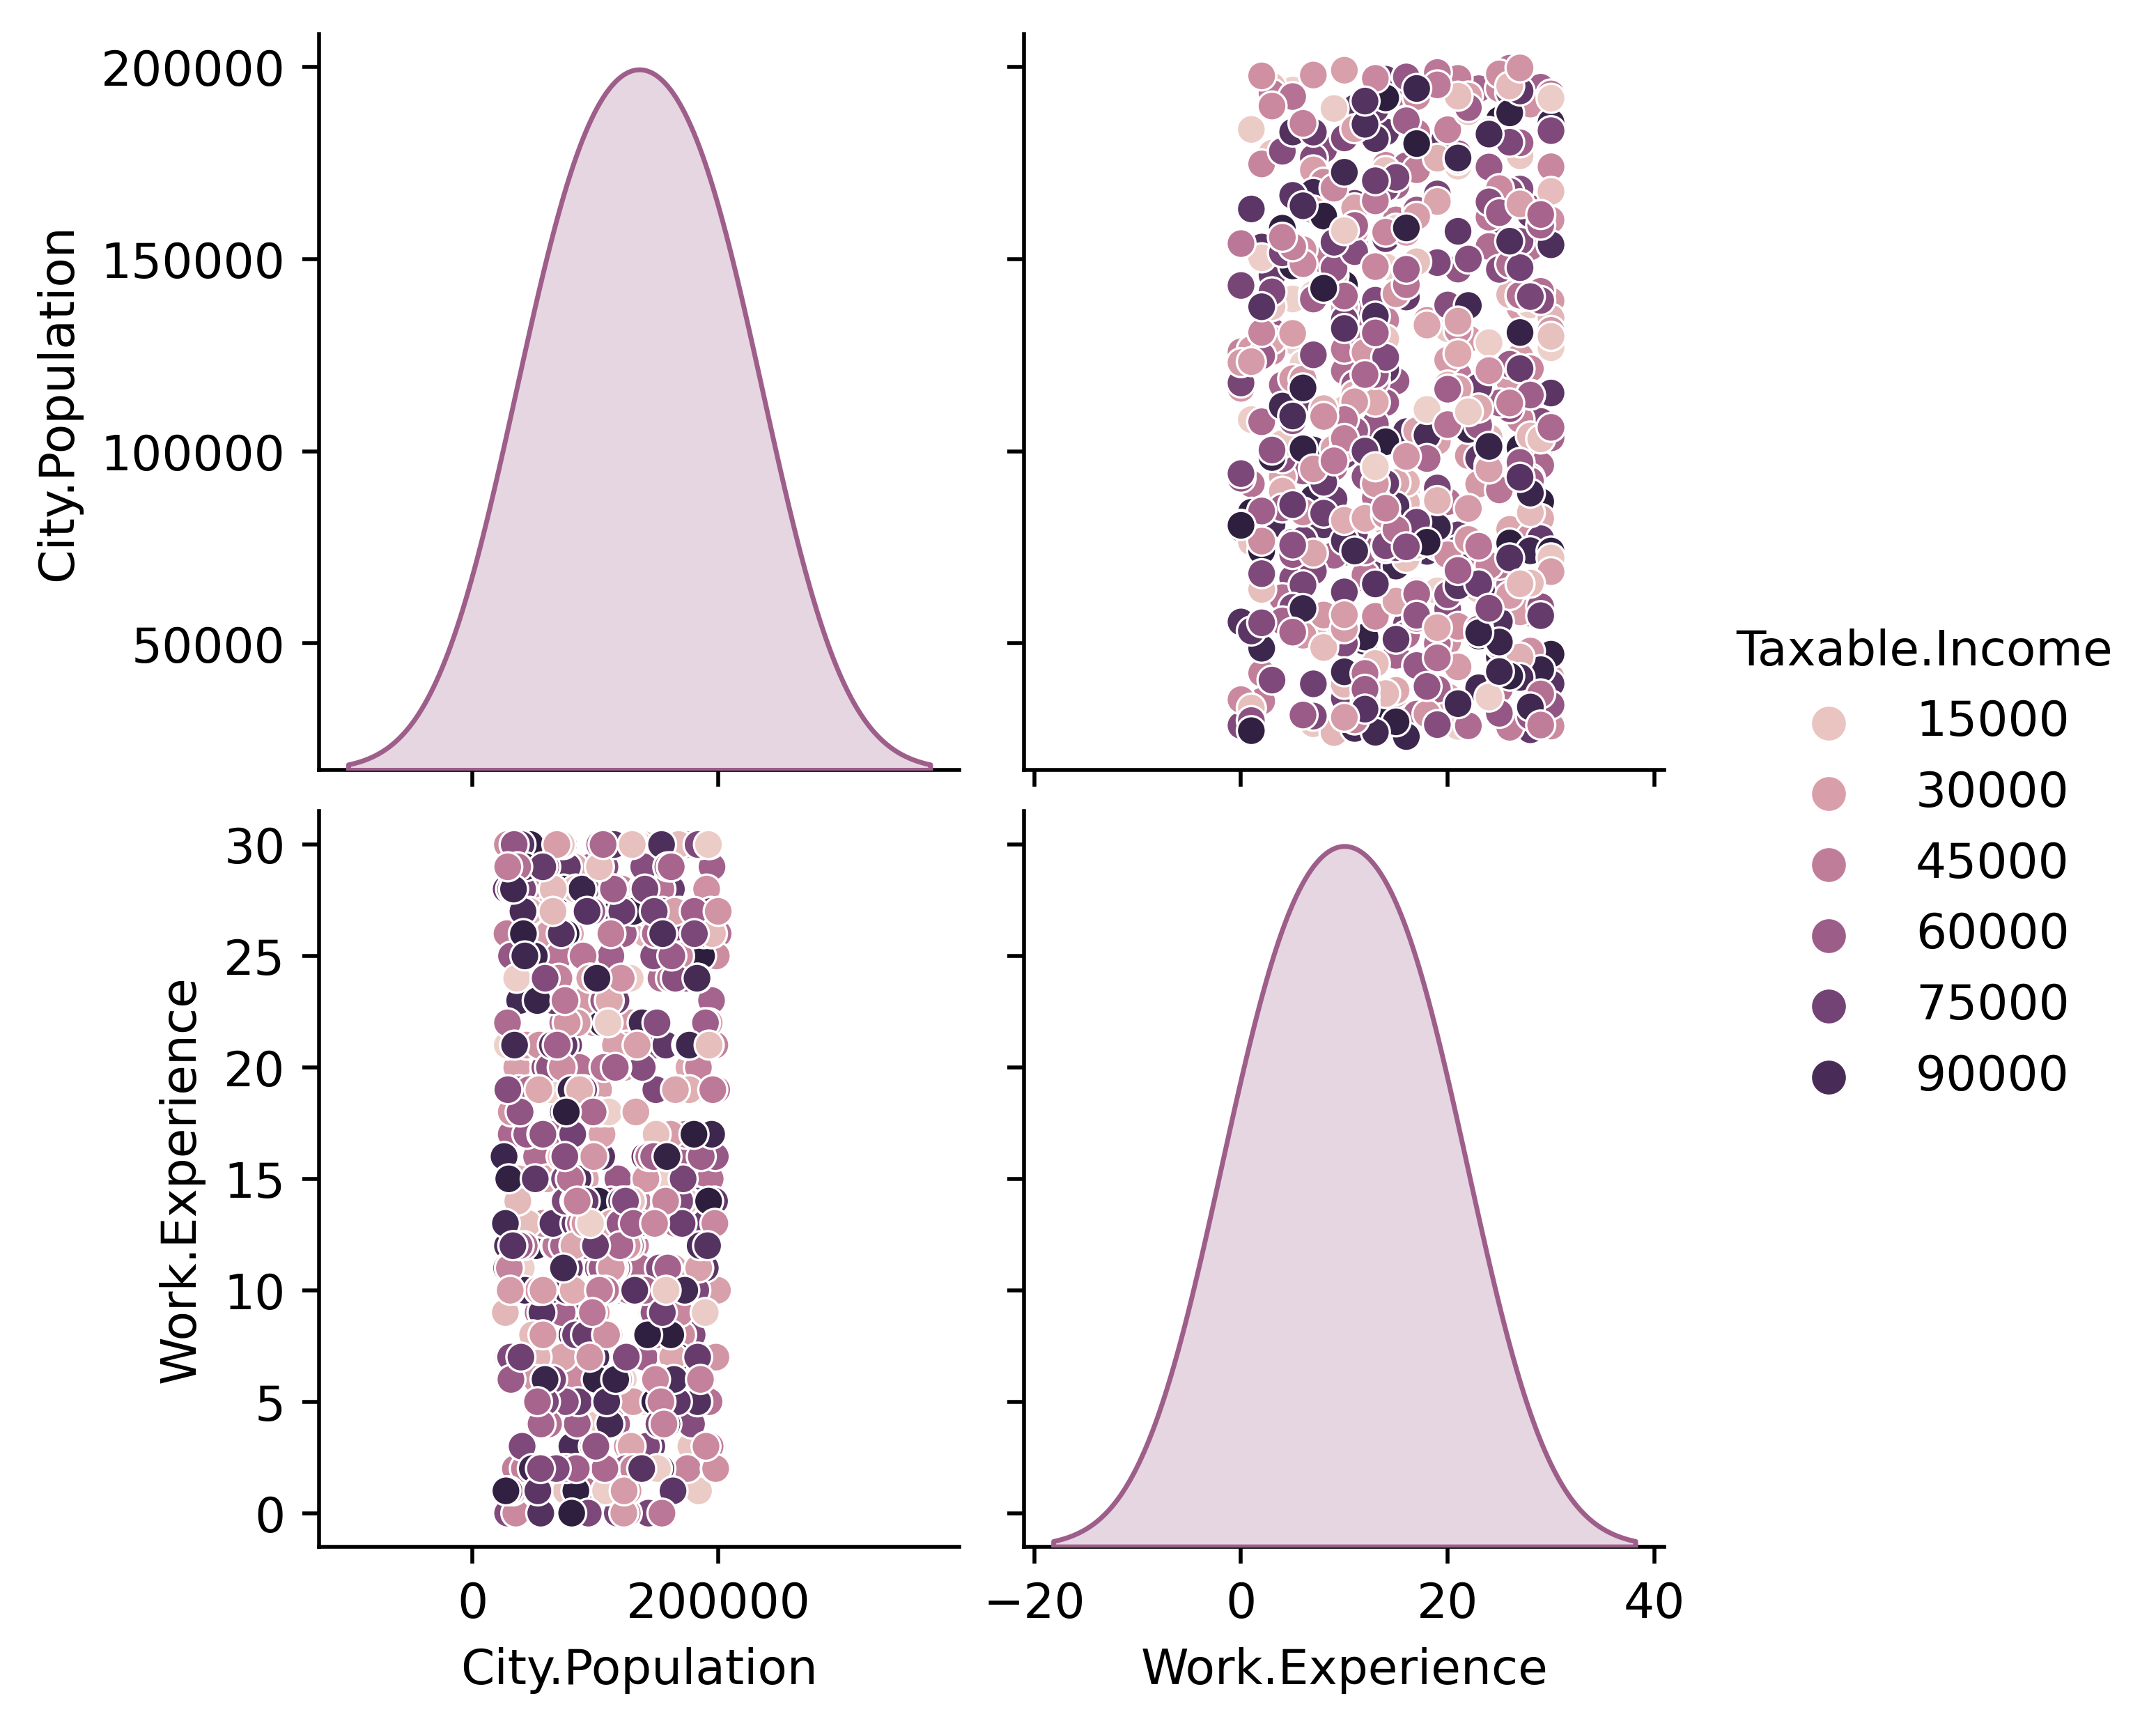

In [6]:
sns.pairplot(data=df,hue='Taxable.Income')

In [7]:
#Creating dummy vairables
df=pd.get_dummies(df,columns=['Undergrad','Marital.Status','Urban'])
df

,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,68833,50047,10,1,0,0,0,1,0,1
1,33700,134075,18,0,1,1,0,0,0,1
2,36925,160205,30,1,0,0,1,0,0,1
3,50190,193264,15,0,1,0,0,1,0,1
4,81002,27533,28,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
595,76340,39492,7,0,1,1,0,0,0,1
596,69967,55369,2,0,1,1,0,0,0,1
597,47334,154058,0,1,0,1,0,0,0,1
598,98592,180083,17,0,1,0,1,0,1,0


In [8]:
df['Taxable.Income'] = df['Taxable.Income'].apply(lambda x: 'Risky' if x <= 30000 else 'Good')

In [9]:
df

,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,Good,50047,10,1,0,0,0,1,0,1
1,Good,134075,18,0,1,1,0,0,0,1
2,Good,160205,30,1,0,0,1,0,0,1
3,Good,193264,15,0,1,0,0,1,0,1
4,Good,27533,28,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
595,Good,39492,7,0,1,1,0,0,0,1
596,Good,55369,2,0,1,1,0,0,0,1
597,Good,154058,0,1,0,1,0,0,0,1
598,Good,180083,17,0,1,0,1,0,1,0


In [10]:
x=df.iloc[:,1:]
y=df['Taxable.Income']

In [11]:
# Splitting data into training and testing data set
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

# Building Decision Tree Classifier using Entropy Criteria

In [12]:
dt=DecisionTreeClassifier(criterion='entropy')

dt.fit(xtrain,ytrain)
ypred=dt.predict(xtest)
ypred

array(['Risky', 'Risky', 'Risky', 'Good', 'Risky', 'Good', 'Good',
       'Risky', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Risky',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Risky', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Good', 'Risky', 'Risky', 'Good',
       'Risky', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Risky', 'Good', 'Good', 'Good', 'Risky', 'Risky', 'Good', 'Good',
       'Risky', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Risky',
       'Risky', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good

In [13]:
# model evaluation

In [14]:
from sklearn.metrics import classification_report, confusion_matrix

In [15]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

        Good       0.78      0.77      0.77        94
       Risky       0.21      0.23      0.22        26

    accuracy                           0.65       120
   macro avg       0.50      0.50      0.50       120
weighted avg       0.66      0.65      0.65       120



In [16]:
confusion_matrix(ytest,ypred)

array([[72, 22],
       [20,  6]], dtype=int64)

In [17]:
print('Training accuracy: ', dt.score(xtrain,ytrain))
print('Testing Accuracy: ', dt.score(xtest,ytest))

Training accuracy:  1.0
Testing Accuracy:  0.65


In [18]:
x.columns

Index(['City.Population', 'Work.Experience', 'Undergrad_NO', 'Undergrad_YES',
       'Marital.Status_Divorced', 'Marital.Status_Married',
       'Marital.Status_Single', 'Urban_NO', 'Urban_YES'],
      dtype='object')

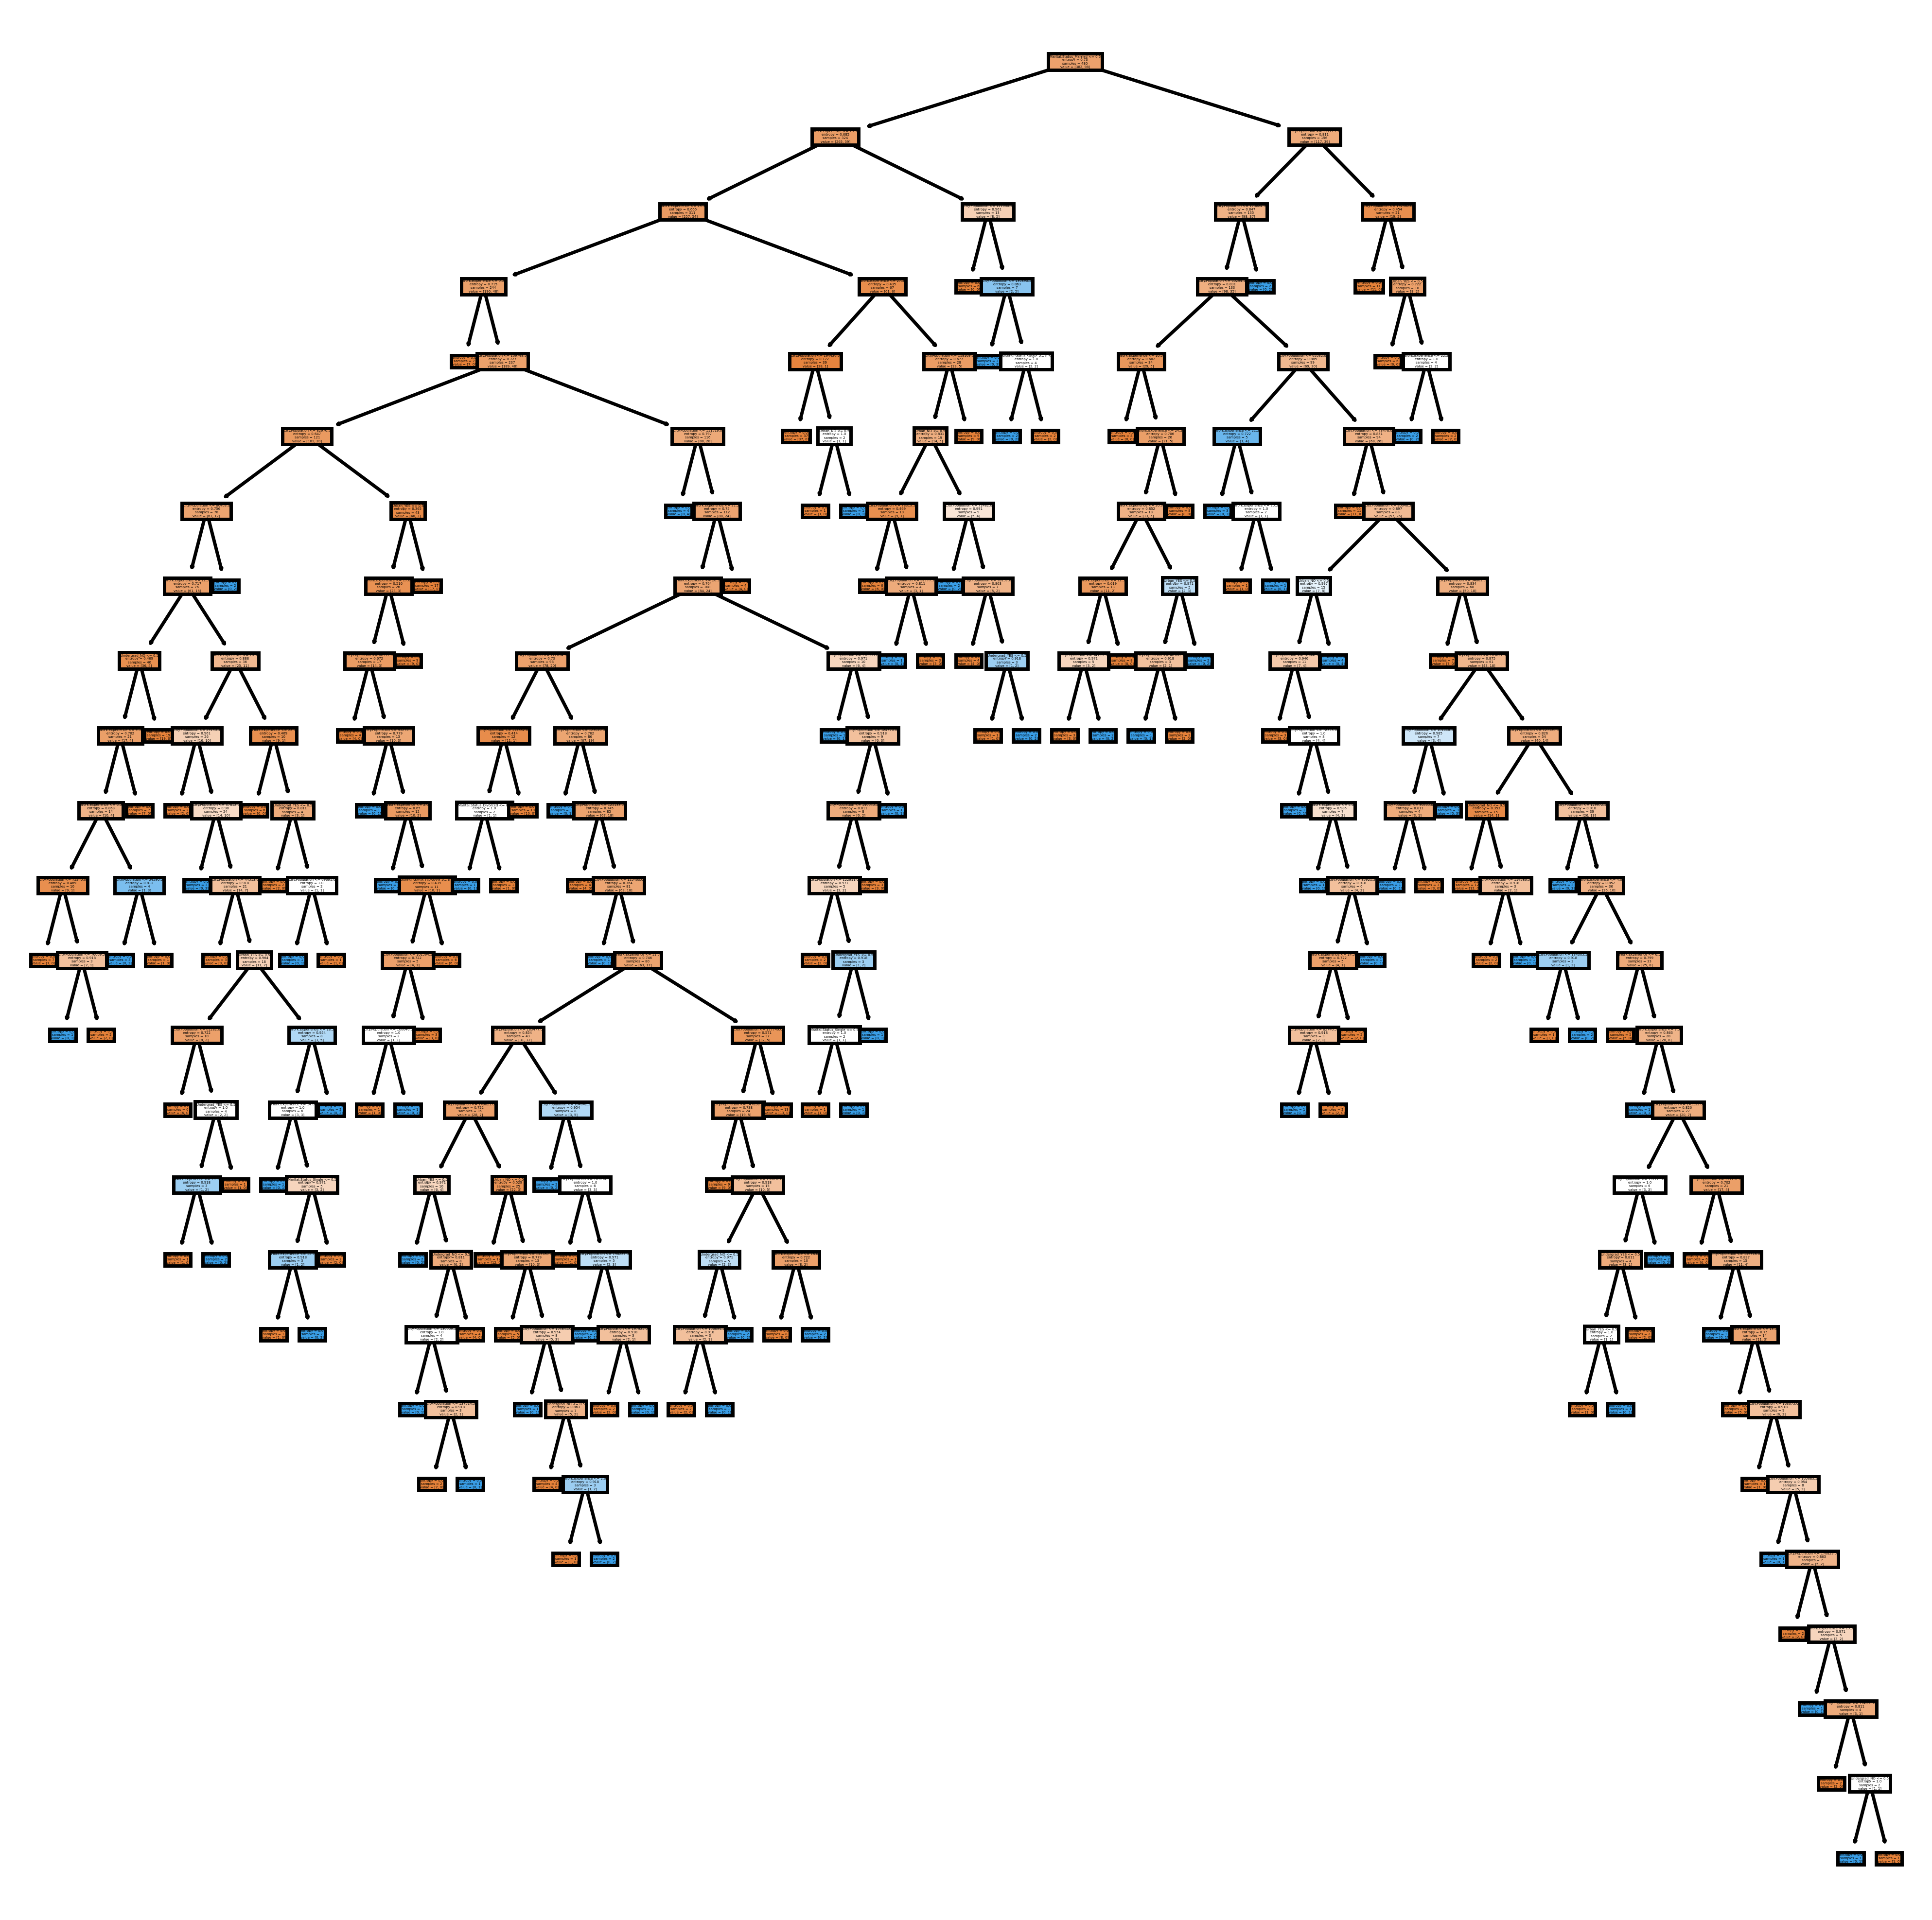

In [19]:
tree.plot_tree(dt,feature_names=x.columns.tolist(),filled=True)
plt.show()

In [20]:
dt.feature_importances_ #It return information gain of all columns

array([0.57837344, 0.23827139, 0.04687912, 0.02067149, 0.00920096,
       0.00600056, 0.02311024, 0.03378277, 0.04371003])

In [21]:
x.columns

Index(['City.Population', 'Work.Experience', 'Undergrad_NO', 'Undergrad_YES',
       'Marital.Status_Divorced', 'Marital.Status_Married',
       'Marital.Status_Single', 'Urban_NO', 'Urban_YES'],
      dtype='object')

# Hyperparameter tuning


In [22]:
from sklearn.model_selection import GridSearchCV

In [32]:
params = {
    'criterion' : ["gini", "entropy", "log_loss"],
    'max_depth' : [3,5,7,9,11,12],
    'splitter' :['best','random']
}

In [33]:
grid = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=params,
                   verbose=1)

In [34]:
grid.fit(xtrain,ytrain)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [3, 5, 7, 9, 11, 12],
                         'splitter': ['best', 'random']},
             verbose=1)

In [35]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 3, 'splitter': 'random'}

In [40]:
dt=DecisionTreeClassifier(criterion='gini', max_depth = 3, splitter='random')

dt.fit(xtrain,ytrain)
ypred=dt.predict(xtest)
ypred

array(['Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
      

In [41]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

        Good       0.78      1.00      0.88        94
       Risky       0.00      0.00      0.00        26

    accuracy                           0.78       120
   macro avg       0.39      0.50      0.44       120
weighted avg       0.61      0.78      0.69       120



In [42]:
confusion_matrix(ytest,ypred)

array([[94,  0],
       [26,  0]], dtype=int64)

In [43]:
print('Training accuracy: ', dt.score(xtrain,ytrain))
print('Testing Accuracy: ', dt.score(xtest,ytest))

Training accuracy:  0.7958333333333333
Testing Accuracy:  0.7833333333333333


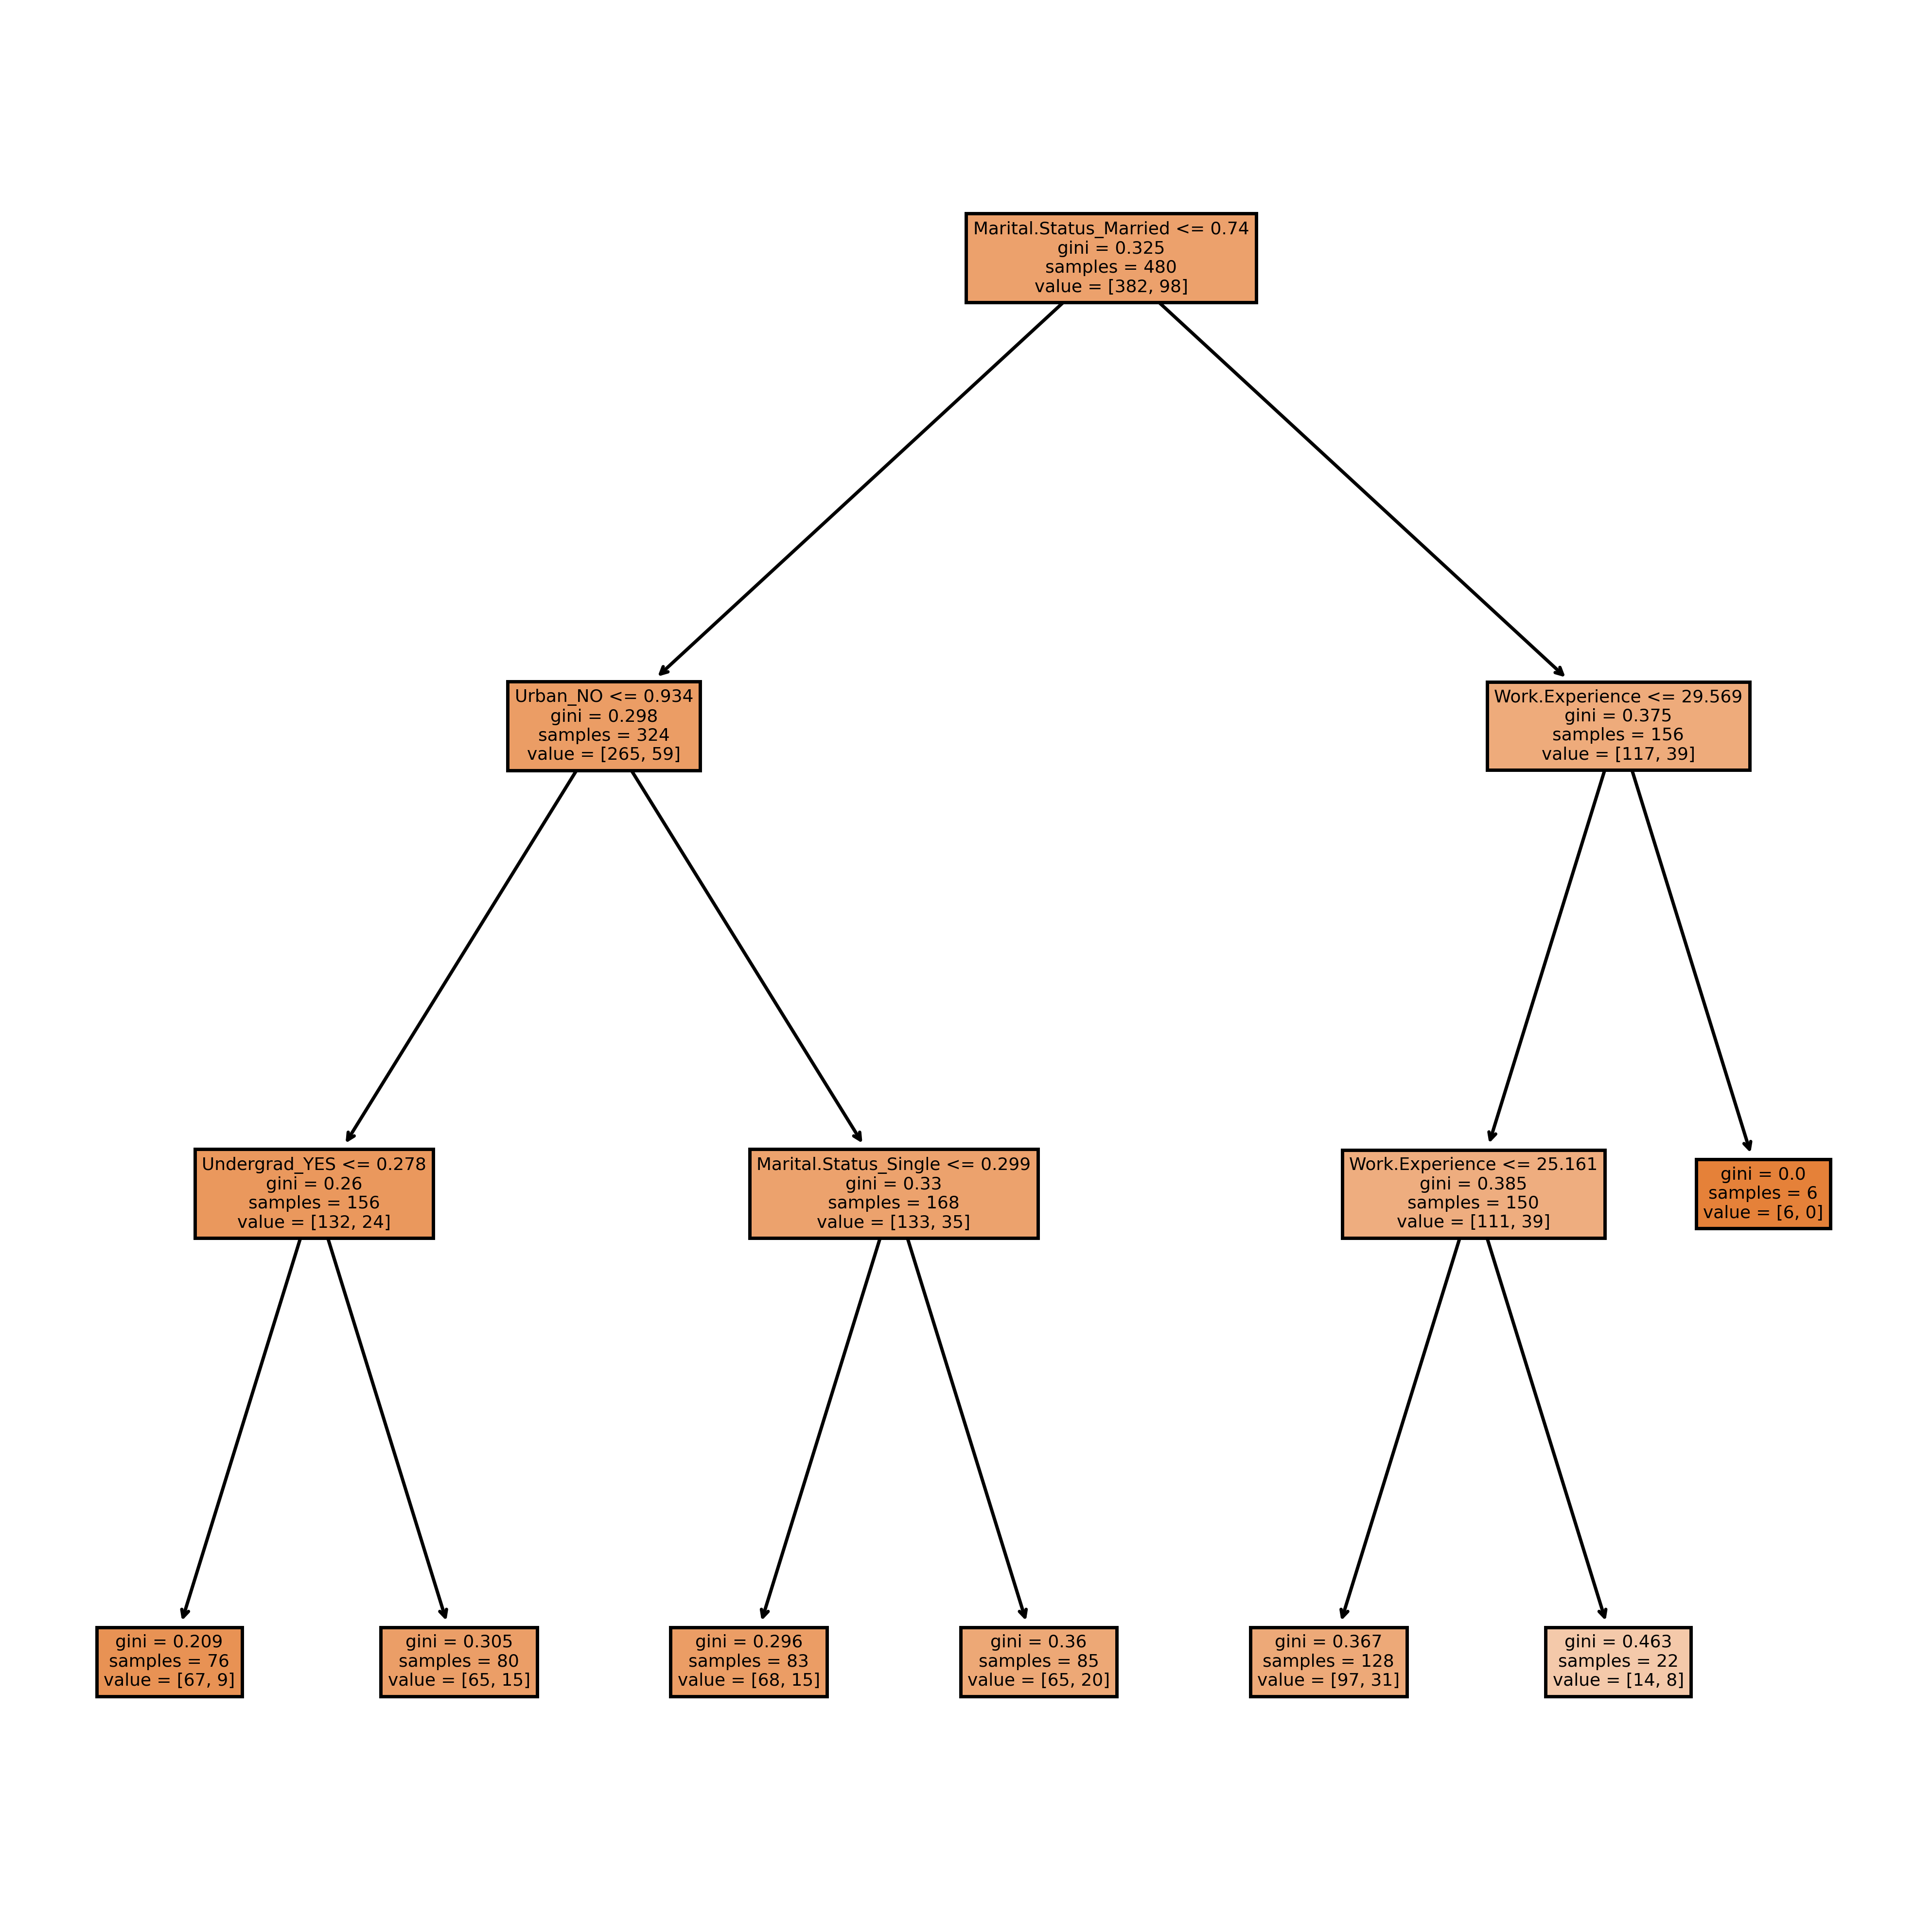

In [44]:
tree.plot_tree(dt,feature_names=x.columns.tolist(),filled=True)
plt.show()